In [85]:
import numpy as np
import scipy
import random
import pandas as pd
import pickle
import seaborn.objects as so
import hashlib

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

matrix = np.random.rand(20, 1)
indices = [i for i in range(20)]

In [875]:
for j, key in enumerate({"1": 1, "2": 2}):
    print(key)

1
2


In [79]:
with open('Metrics.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [810]:
import glob
with open("Metrics_Folder/Metrics_15.pickle", 'rb') as handle:
    metrics = pickle.load(handle)

#metrics = [element[0] for element in metrics]

In [811]:
df_runs = pd.DataFrame(metrics).drop(["expert metrics", "verma", "hemmer"], axis=1)
df_runs

,labeler_ids,init_size,labels_per_round,rounds,labeled,cost,overlap,setting,mod,expert_predict,sample_equal
0,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,False
1,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,True
2,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,False
3,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,True
4,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,False
5,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,True
6,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,False
7,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,True
8,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,False
9,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,True


In [752]:
metrics[0]["verma"]

{1: {0: {'train': {0: {'coverage': '366 out of600',
     'system_accuracy': 86.66666666666667,
     'expert_accuracy': 85.4700124187928,
     'classifier_accuracy': 87.4316701006366,
     'alone_classifier': 83.83333333333333,
     'validation_loss': 3.8957728862762453,
     'n_experts': 2,
     'expert_0': 89.80880279133402,
     'expert_1': 76.6231776021361,
     'expert_0_coverage': 157,
     'expert_1_coverage': 77,
     'cov_classifier': 366,
     'acc_experts': [89.80880279133402, 76.6231776021361],
     'cov_experts': [157, 77]},
    1: {'coverage': '492 out of600',
     'system_accuracy': 92.66666666666667,
     'expert_accuracy': 87.0368758576373,
     'classifier_accuracy': 93.90241993853253,
     'alone_classifier': 91.16666666666667,
     'validation_loss': 4.0484535694122314,
     'n_experts': 2,
     'expert_0': 87.37847110976483,
     'expert_1': 79.99680012799487,
     'expert_0_coverage': 103,
     'expert_1_coverage': 5,
     'cov_classifier': 492,
     'acc_experts':

In [828]:
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats                

def get_values(run, method, metric_name, step):
    met = {}     
    for seed, el1 in metrics[run][method].items():
        for fold, el2 in el1.items():
            if method == "hemmer" and metric_name == "Classifier Coverage":
                n_images = getCountOfCoverage(metrics[run]["verma"][seed][fold][step][0]["coverage"])
                met[f"Seed_{seed}_Fold_{fold}"] = n_images * pd.Series([el3[metric_name] for key3, el3 in el2[step].items()])
            else:
                met[f"Seed_{seed}_Fold_{fold}"] = pd.Series([el3[metric_name] for key3, el3 in el2[step].items()])

    return pd.DataFrame(met)

def plot_metrics(met): 
    df = met.reset_index().melt('index', var_name='cols',  value_name='vals')
    sns.lineplot(df, x="index", y="vals", hue='cols',)

def check_all_ttest(df, p=0.05, equal_var=False):
    for i in range(len(df.columns)):
        for j in range(i+1, len(df.columns)):
            res = get_ttest(df.iloc[:,[i]], df.iloc[:,[j]], equal_var=equal_var)
            if res.pvalue <= p:
                print(res)
                print(f"i: {df.columns[i]}, j: {df.columns[j]}")

def get_ttest(value1, value2, equal_var=True):
    res = ttest_ind(value1, value2, equal_var=equal_var)
    #print(res)
    return res


def create_runs_plot(metrics, method, metrics_name, step):
    values = []
    for i in range(len(metrics)):
        values.append(get_values(i, method, metrics_name, step))

    dic = []
    for value in values:
        dic.append(value.max())

    df = pd.DataFrame(dic)
    df = df.T.reset_index(drop=True)

    sns.boxplot(df)

    check_all_ttest(df, 0.05, True)

    df_runs.head(10)

def getCountOfCoverage(text):
    marker = None
    for j in range(len(text)):
        if text[-j] == "f":
            marker = j -1
    return int(text[-marker:])



In [813]:
def create_dataframe_one_metric(metric, run, method, seed, fold, step):
    if method == "verma":
        return create_dataframe_verma(metric, run, seed, fold, step)

def create_dataframe_verma(metric, run, seed, fold, step):
    df = pd.DataFrame(metrics[run]["verma"][seed][fold][step]).drop(["acc_experts", "cov_experts"], axis=0).T
    df["coverage"] = df["coverage"].apply(lambda x: getCountOfCoverage(x))
    df.rename(columns={'coverage':'n_images'}, inplace=True)
    return df

In [814]:
df = create_dataframe_one_metric(metrics, 0, "verma", 1, 0, "val")
df

,n_images,system_accuracy,expert_accuracy,classifier_accuracy,alone_classifier,validation_loss,n_experts,expert_0,expert_1,expert_0_coverage,expert_1_coverage,cov_classifier
0,168,79.761905,89.999775,70.454465,69.047619,3.94559,2,91.488972,87.878255,47,33,88
1,168,78.571429,93.102806,75.539514,75.595238,4.313956,2,93.102806,0.0,29,0,139
2,168,78.571429,91.665903,76.388836,76.190476,5.260923,2,91.303554,99.980004,23,1,144
3,168,79.166667,92.85648,76.428517,75.0,6.615823,2,95.453678,83.330556,22,6,140
4,168,83.928571,86.206302,83.453177,75.595238,6.591594,2,95.237188,62.498438,21,8,139
5,168,80.357143,91.999264,78.321624,75.0,8.541866,2,94.443395,85.711837,18,7,143
6,168,80.357143,84.614951,79.069706,78.571429,9.578106,2,91.303554,74.999063,23,16,129
7,168,79.761905,76.922485,80.281634,77.97619,9.147709,2,93.332089,54.544463,15,11,142
8,168,77.97619,90.321998,75.182427,76.190476,10.89984,2,95.453678,77.776049,22,9,137
9,168,77.97619,87.999296,76.223723,72.619048,10.812359,2,99.998667,69.9986,15,10,143


In [807]:
df_dict = {}
for fold, element in metrics[0]["verma"][1].items():
    df_dict[f"Fold_{fold}"] = create_dataframe_one_metric(metrics, 0, "verma", 1, fold, "val")
pd.concat(df_dict).loc["Fold_1"]

,n_images,system_accuracy,expert_accuracy,classifier_accuracy,alone_classifier,validation_loss,n_experts,expert_0,expert_1,expert_0_coverage,expert_1_coverage,cov_classifier
0,172,77.906977,89.215511,61.428484,61.046512,4.048473,2,90.816141,49.9975,98,4,70
1,172,80.813953,92.307337,75.83327,72.674419,4.345853,2,92.307337,0.0,52,0,120
2,172,80.232558,94.99905,78.289422,76.744186,5.673176,2,94.99905,0.0,20,0,152
3,172,83.139535,94.99905,81.578894,78.488372,6.585582,2,94.735845,99.980004,19,1,152
4,172,80.232558,93.547784,77.30491,75.0,7.402472,2,93.332711,99.980004,30,1,141
5,172,79.069767,82.856669,78.102133,75.0,9.552022,2,89.654554,49.998333,29,6,137
6,172,77.325581,87.036715,72.881294,75.0,10.273809,2,90.697253,72.72595,43,11,118
7,172,80.813953,88.371682,78.294513,77.325581,10.486623,2,90.90854,79.9984,33,10,129
8,172,77.906977,92.104778,73.880542,71.511628,10.373088,2,91.666157,99.990001,36,2,134
9,172,83.72093,91.83636,80.487739,77.325581,11.356748,2,92.499538,88.886914,40,9,123


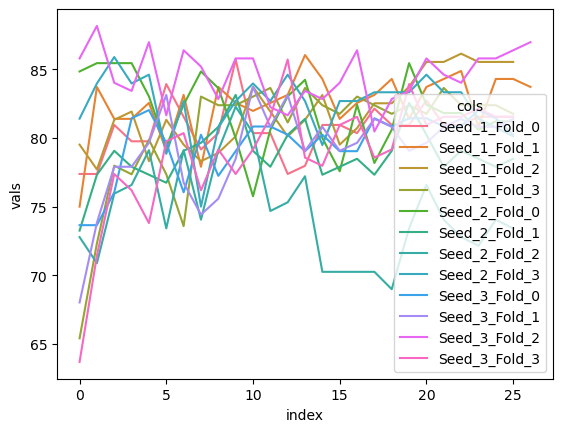

In [709]:
values = []
for i in range(len(metrics)):
    values.append(get_values(i, "verma", "system_accuracy", "val"))
plot_metrics(values[6])

Ttest_indResult(statistic=array([-3.92057255]), pvalue=array([0.00094196]))
i: 0, j: 12
Ttest_indResult(statistic=array([-3.40562268]), pvalue=array([0.002538]))
i: 0, j: 13
Ttest_indResult(statistic=array([-3.50721739]), pvalue=array([0.00199074]))
i: 0, j: 14
Ttest_indResult(statistic=array([-6.41599623]), pvalue=array([3.05282355e-06]))
i: 0, j: 15
Ttest_indResult(statistic=array([-3.16379845]), pvalue=array([0.00555673]))
i: 1, j: 12
Ttest_indResult(statistic=array([-2.83781214]), pvalue=array([0.00963901]))
i: 1, j: 13
Ttest_indResult(statistic=array([-2.91715114]), pvalue=array([0.00810058]))
i: 1, j: 14
Ttest_indResult(statistic=array([-5.4844505]), pvalue=array([2.99630443e-05]))
i: 1, j: 15
Ttest_indResult(statistic=array([-1.94103378]), pvalue=array([0.06585219]))
i: 2, j: 3
Ttest_indResult(statistic=array([-2.24729539]), pvalue=array([0.03504833]))
i: 2, j: 10
Ttest_indResult(statistic=array([-4.6605717]), pvalue=array([0.00016904]))
i: 2, j: 12
Ttest_indResult(statistic=arr

,labeler_ids,init_size,labels_per_round,rounds,labeled,cost,overlap,setting,mod,expert_predict,sample_equal
0,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,False
1,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,True
2,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,False
3,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,True
4,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,False
5,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,True
6,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,False
7,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,True
8,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,False
9,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,True


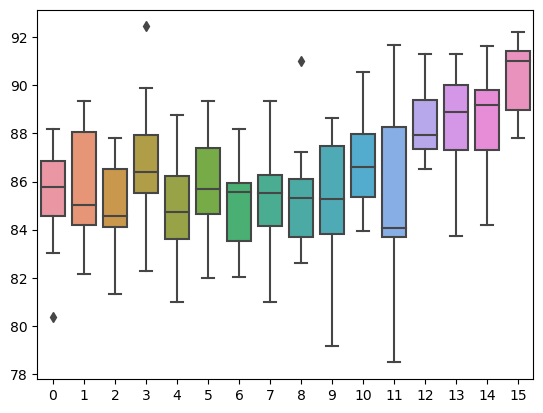

In [864]:
values = []
for i in range(len(metrics)):
    values.append(get_values(i, "verma", "system_accuracy", "val"))

dic = []
for value in values:
    dic.append(value.max())

df = pd.DataFrame(dic)
#df.index = ["False", "True"]
#df.index = df_runs[["mod"]]
df = df.T.reset_index(drop=True)
#df.columns = df_runs["mod"].astype("string") + "_" + df_runs["expert_predict"].astype("string") + "_" + df_runs["sample_equal"].astype("string")

df = df.T.iloc[:].T

sns.boxplot(df)

check_all_ttest(df, 0.1, False)

df_runs.iloc[:]



/tmp/ipykernel_2097622/380030797.py:30: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = ttest_ind(value1, value2, equal_var=equal_var)
/home/joli/joli-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/joli/joli-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


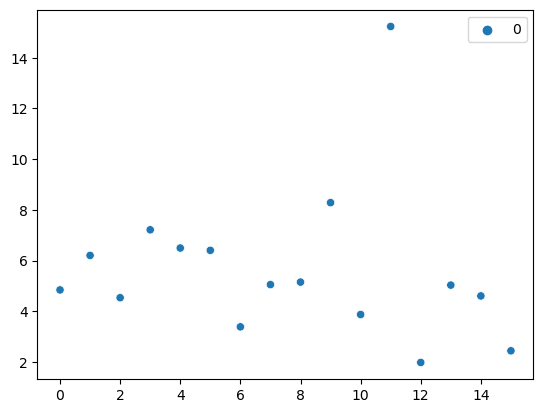

In [865]:
values = []
for i in range(len(metrics)):
    values.append(get_values(i, "verma", "system_accuracy", "val"))

dic = []
for value in values:
    dic.append(value.max().var())

df = pd.DataFrame(dic)
#df.index = ["False", "True"]
#df.index = df_runs[["mod"]]
df = df.T.reset_index(drop=True)
#df.columns = df_runs["mod"].astype("string") + "_" + df_runs["expert_predict"].astype("string") + "_" + df_runs["sample_equal"].astype("string")

df = df.T.iloc[:].T

sns.scatterplot(df.T)

check_all_ttest(df, 0.1, False)

#df_runs.iloc[:]

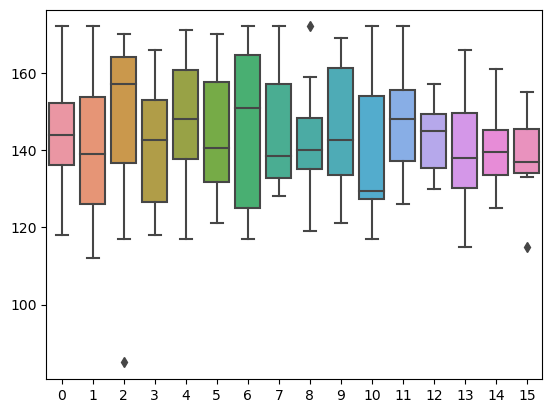

In [830]:
create_runs_plot(metrics, "verma", "cov_classifier", "val")

Ttest_indResult(statistic=array([-3.61632823]), pvalue=array([0.00153005]))
i: 0, j: 12
Ttest_indResult(statistic=array([-2.81039192]), pvalue=array([0.01019206]))
i: 0, j: 14
Ttest_indResult(statistic=array([-3.55227424]), pvalue=array([0.00178525]))
i: 0, j: 15
Ttest_indResult(statistic=array([-3.42270726]), pvalue=array([0.0024356]))
i: 1, j: 12
Ttest_indResult(statistic=array([-2.57743474]), pvalue=array([0.017182]))
i: 1, j: 14
Ttest_indResult(statistic=array([-3.38008087]), pvalue=array([0.00269642]))
i: 1, j: 15
Ttest_indResult(statistic=array([-3.12888453]), pvalue=array([0.00488356]))
i: 2, j: 12
Ttest_indResult(statistic=array([-2.33288052]), pvalue=array([0.02920026]))
i: 2, j: 14
Ttest_indResult(statistic=array([-3.19811297]), pvalue=array([0.00415049]))
i: 2, j: 15
Ttest_indResult(statistic=array([-2.08971694]), pvalue=array([0.0484194]))
i: 3, j: 12
Ttest_indResult(statistic=array([-2.32021746]), pvalue=array([0.02999632]))
i: 3, j: 15
Ttest_indResult(statistic=array([-4.

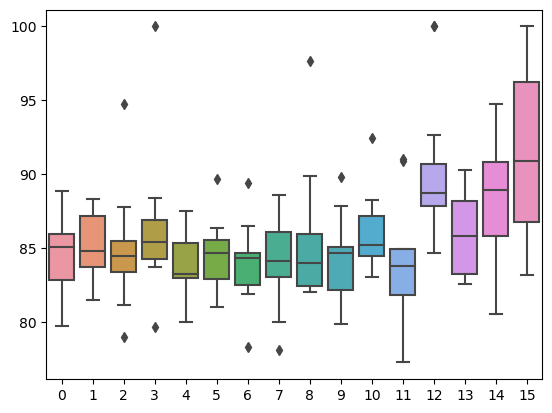

In [831]:
create_runs_plot(metrics, "verma", "classifier_accuracy", "val")

Ttest_indResult(statistic=array([-2.4940502]), pvalue=array([0.02277036]))
i: 0, j: 3
Ttest_indResult(statistic=array([-2.2884114]), pvalue=array([0.038334]))
i: 0, j: 10
Ttest_indResult(statistic=array([-2.59947901]), pvalue=array([0.01766666]))
i: 0, j: 12
Ttest_indResult(statistic=array([-3.41247594]), pvalue=array([0.00374433]))
i: 0, j: 13
Ttest_indResult(statistic=array([-4.48553922]), pvalue=array([0.00031586]))
i: 0, j: 14
Ttest_indResult(statistic=array([-3.35789201]), pvalue=array([0.00305612]))
i: 0, j: 15
Ttest_indResult(statistic=array([-2.17161094]), pvalue=array([0.04318742]))
i: 1, j: 3
Ttest_indResult(statistic=array([-2.29037913]), pvalue=array([0.03485279]))
i: 1, j: 12
Ttest_indResult(statistic=array([-4.04455414]), pvalue=array([0.00058627]))
i: 1, j: 13
Ttest_indResult(statistic=array([-5.62448699]), pvalue=array([2.05055013e-05]))
i: 1, j: 14
Ttest_indResult(statistic=array([-3.35586553]), pvalue=array([0.00407403]))
i: 1, j: 15
Ttest_indResult(statistic=array([-

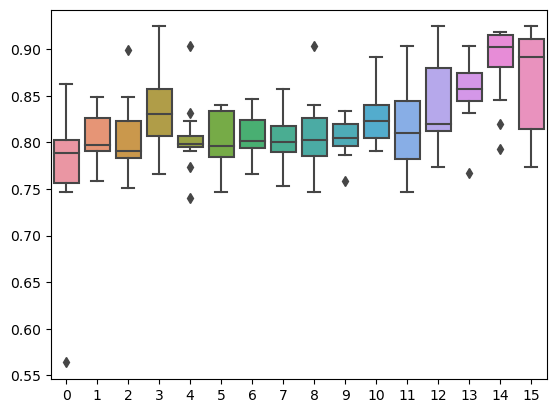

In [832]:
values = []
for i in range(len(metrics)):
    values.append(get_values(i, "hemmer", "system_accuracy", "val"))

dic = []
for value in values:
    dic.append(value.max())

df = pd.DataFrame(dic)
#df.index = ["False", "True"]
df = df.T.reset_index(drop=True)

sns.boxplot(df)

check_all_ttest(df, 0.05, False)

Ttest_indResult(statistic=array([2.36274765]), pvalue=array([0.02739903]))
i: 0, j: 13
Ttest_indResult(statistic=array([2.43164745]), pvalue=array([0.02362784]))
i: 0, j: 14
Ttest_indResult(statistic=array([2.30187823]), pvalue=array([0.03118458]))
i: 4, j: 13
Ttest_indResult(statistic=array([2.39284046]), pvalue=array([0.02568828]))
i: 4, j: 14
Ttest_indResult(statistic=array([2.2475877]), pvalue=array([0.03495961]))
i: 5, j: 13
Ttest_indResult(statistic=array([2.36019311]), pvalue=array([0.02754899]))
i: 5, j: 14
Ttest_indResult(statistic=array([2.33092664]), pvalue=array([0.0293218]))
i: 6, j: 13
Ttest_indResult(statistic=array([2.4116778]), pvalue=array([0.0246682]))
i: 6, j: 14
Ttest_indResult(statistic=array([2.28286634]), pvalue=array([0.03246187]))
i: 8, j: 13
Ttest_indResult(statistic=array([2.38502914]), pvalue=array([0.0261226]))
i: 8, j: 14
Ttest_indResult(statistic=array([2.21207087]), pvalue=array([0.03765018]))
i: 9, j: 14


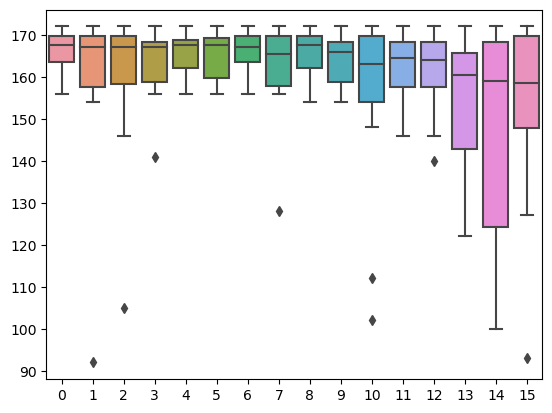

In [833]:
create_runs_plot(metrics, "hemmer", "Classifier Coverage", "val")

Ttest_indResult(statistic=array([2.83136409]), pvalue=array([0.00971699]))
i: 1, j: 12
Ttest_indResult(statistic=array([4.21571571]), pvalue=array([0.00035626]))
i: 1, j: 13
Ttest_indResult(statistic=array([2.41484868]), pvalue=array([0.02450022]))
i: 2, j: 12
Ttest_indResult(statistic=array([4.07570774]), pvalue=array([0.00050146]))
i: 2, j: 13
Ttest_indResult(statistic=array([3.18816069]), pvalue=array([0.0042489]))
i: 3, j: 12
Ttest_indResult(statistic=array([4.32158496]), pvalue=array([0.00027505]))
i: 3, j: 13
Ttest_indResult(statistic=array([2.1367317]), pvalue=array([0.04398993]))
i: 3, j: 14
Ttest_indResult(statistic=array([2.27175879]), pvalue=array([0.0332301]))
i: 4, j: 12
Ttest_indResult(statistic=array([4.01357151]), pvalue=array([0.00058352]))
i: 4, j: 13
Ttest_indResult(statistic=array([2.25537577]), pvalue=array([0.03439358]))
i: 5, j: 12
Ttest_indResult(statistic=array([3.98844001]), pvalue=array([0.00062038]))
i: 5, j: 13
Ttest_indResult(statistic=array([3.05573414]),

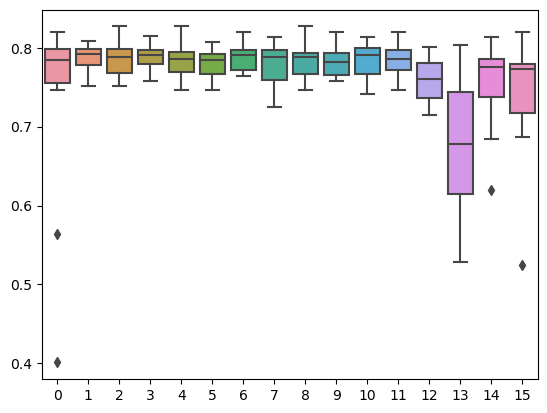

In [834]:
create_runs_plot(metrics, "hemmer", "Classifier Accuracy", "val")

In [725]:
metrics[0]["hemmer"]

{1: {0: {'train': {1: {'system_accuracy': 0.5083333333333333,
     'train_system_loss': 0.7703079004238145,
     'Classifier Accuracy': 0.5083333333333333,
     'Classifier Task Subset Accuracy': 0.5083333333333333,
     'Classifier Coverage': 1.0,
     'Expert_4323195249': {'expert_accuracy': 0.9133333333333333,
      'expert_task_subset_accuracy': 0,
      'expert_coverage': 0.0},
     'Expert_4295232296': {'expert_accuracy': 0.7933333333333333,
      'expert_task_subset_accuracy': 0,
      'expert_coverage': 0.0}},
    2: {'system_accuracy': 0.7766666666666666,
     'train_system_loss': 0.49076990397351816,
     'Classifier Accuracy': 0.7766666666666666,
     'Classifier Task Subset Accuracy': 0.7766666666666666,
     'Classifier Coverage': 1.0,
     'Expert_4323195249': {'expert_accuracy': 0.9133333333333333,
      'expert_task_subset_accuracy': 0,
      'expert_coverage': 0.0},
     'Expert_4295232296': {'expert_accuracy': 0.7933333333333333,
      'expert_task_subset_accuracy': 0

84

In [644]:
values = []
for i in range(len(metrics)):
    values.append(get_values(i, "verma", "cov_experts", "val"))
values

[   Seed_1_Fold_0 Seed_1_Fold_1 Seed_1_Fold_2 Seed_1_Fold_3 Seed_2_Fold_0  \
 0       [47, 33]       [98, 4]      [41, 18]       [6, 49]      [16, 10]   
 1        [29, 0]       [52, 0]       [23, 1]       [0, 14]        [4, 6]   
 2        [23, 1]       [20, 0]       [28, 1]       [0, 11]       [6, 11]   
 3        [22, 6]       [19, 1]       [36, 2]       [0, 12]      [10, 14]   
 4        [21, 8]       [30, 1]       [27, 9]       [1, 24]      [12, 14]   
 5        [18, 7]       [29, 6]       [44, 7]       [2, 19]      [25, 13]   
 6       [23, 16]      [43, 11]      [33, 12]       [7, 22]      [22, 20]   
 7       [15, 11]      [33, 10]      [32, 18]       [7, 30]      [21, 19]   
 8        [22, 9]       [36, 2]      [27, 18]       [8, 21]      [17, 16]   
 9       [15, 10]       [40, 9]      [34, 23]       [7, 24]      [19, 18]   
 10      [29, 15]      [34, 12]      [37, 15]      [10, 24]      [26, 17]   
 11      [24, 15]       [40, 9]      [34, 14]       [8, 28]      [35, 16]   

In [674]:
import math

expert_metrics = []
for run in values:
    temp1 = {
        4323195249: {},
        4295232296: {},
    }
    for column in run:
        temp1[4323195249][column] = [el[0] if isinstance(el, list) else None for el in run[column]]
        temp1[4295232296][column] = [el[0] if isinstance(el, list) else None for el in run[column]]
    expert_metrics.append(temp1)

In [700]:
pd.DataFrame(pd.DataFrame(expert_metrics)[4323195249])

,4323195249
0,"{'Seed_1_Fold_0': [47, 29, 23, 22, 21, 18, 23,..."
1,"{'Seed_1_Fold_0': [44, 13, 4, 15, 19, 34, 36, ..."
2,"{'Seed_1_Fold_0': [77, 64, 62, 46, 32, 44, 43,..."
3,"{'Seed_1_Fold_0': [78, 73, 75, 50, 33, 37, 41,..."
4,"{'Seed_1_Fold_0': [72, 17, 9, 8, 16, 26, 22, 1..."
5,"{'Seed_1_Fold_0': [83, 41, 16, 12, 17, 17, 24,..."
6,"{'Seed_1_Fold_0': [74, 20, 8, 7, 21, 16, 18, 2..."
7,"{'Seed_1_Fold_0': [124, 107, 88, 52, 44, 35, 4..."


In [673]:
df1 = pd.DataFrame(temp1[4323195249])

In [671]:
df11 = df1.fillna(df1.mean())
pd.DataFrame(df11.mean())

,0
Seed_1_Fold_0,24.115385
Seed_1_Fold_1,39.846154
Seed_1_Fold_2,37.923077
Seed_1_Fold_3,6.038462
Seed_2_Fold_0,21.500000
Seed_2_Fold_1,10.230769
Seed_2_Fold_2,23.576923
Seed_2_Fold_3,45.269231
Seed_3_Fold_0,32.269231
Seed_3_Fold_1,32.222222


In [648]:
pd.DataFrame(temp1[4323195249])

,Seed_1_Fold_0,Seed_1_Fold_1,Seed_1_Fold_2,Seed_1_Fold_3,Seed_2_Fold_0,Seed_2_Fold_1,Seed_2_Fold_2,Seed_2_Fold_3,Seed_3_Fold_0,Seed_3_Fold_1,Seed_3_Fold_2,Seed_3_Fold_3
0,47.0,98.0,41.0,6.0,16.0,21.0,14.0,57.0,24.0,60,94.0,75
1,29.0,52.0,23.0,0.0,4.0,0.0,8.0,79.0,23.0,33,92.0,113
2,23.0,20.0,28.0,0.0,6.0,1.0,5.0,66.0,33.0,15,59.0,76
3,22.0,19.0,36.0,0.0,10.0,1.0,13.0,37.0,39.0,17,51.0,53
4,21.0,30.0,27.0,1.0,12.0,9.0,19.0,40.0,28.0,12,42.0,30
5,18.0,29.0,44.0,2.0,25.0,12.0,22.0,39.0,30.0,17,40.0,25
6,23.0,43.0,33.0,7.0,22.0,5.0,20.0,35.0,17.0,31,29.0,47
7,15.0,33.0,32.0,7.0,21.0,11.0,26.0,39.0,26.0,28,60.0,35
8,22.0,36.0,27.0,8.0,17.0,9.0,35.0,31.0,29.0,32,45.0,56
9,15.0,40.0,34.0,7.0,19.0,10.0,29.0,41.0,37.0,32,40.0,56


In [607]:
values[0]

,Seed_1_Fold_0,Seed_1_Fold_1,Seed_1_Fold_2,Seed_1_Fold_3,Seed_2_Fold_0,Seed_2_Fold_1,Seed_2_Fold_2,Seed_2_Fold_3,Seed_3_Fold_0,Seed_3_Fold_1,Seed_3_Fold_2,Seed_3_Fold_3
0,"[47, 33]","[98, 4]","[41, 18]","[6, 49]","[16, 10]","[21, 23]","[14, 3]","[57, 1]","[24, 3]","[60, 65]","[94, 1]","[75, 16]"
1,"[29, 0]","[52, 0]","[23, 1]","[0, 14]","[4, 6]","[0, 0]","[8, 0]","[79, 0]","[23, 0]","[33, 65]","[92, 0]","[113, 3]"
2,"[23, 1]","[20, 0]","[28, 1]","[0, 11]","[6, 11]","[1, 0]","[5, 0]","[66, 0]","[33, 0]","[15, 76]","[59, 0]","[76, 7]"
3,"[22, 6]","[19, 1]","[36, 2]","[0, 12]","[10, 14]","[1, 0]","[13, 0]","[37, 0]","[39, 0]","[17, 65]","[51, 0]","[53, 17]"
4,"[21, 8]","[30, 1]","[27, 9]","[1, 24]","[12, 14]","[9, 0]","[19, 0]","[40, 0]","[28, 1]","[12, 57]","[42, 0]","[30, 17]"
5,"[18, 7]","[29, 6]","[44, 7]","[2, 19]","[25, 13]","[12, 3]","[22, 0]","[39, 0]","[30, 8]","[17, 37]","[40, 2]","[25, 12]"
6,"[23, 16]","[43, 11]","[33, 12]","[7, 22]","[22, 20]","[5, 4]","[20, 2]","[35, 0]","[17, 8]","[31, 45]","[29, 2]","[47, 26]"
7,"[15, 11]","[33, 10]","[32, 18]","[7, 30]","[21, 19]","[11, 1]","[26, 2]","[39, 0]","[26, 3]","[28, 44]","[60, 4]","[35, 27]"
8,"[22, 9]","[36, 2]","[27, 18]","[8, 21]","[17, 16]","[9, 1]","[35, 0]","[31, 0]","[29, 8]","[32, 39]","[45, 6]","[56, 16]"
9,"[15, 10]","[40, 9]","[34, 23]","[7, 24]","[19, 18]","[10, 3]","[29, 0]","[41, 0]","[37, 9]","[32, 48]","[40, 7]","[56, 16]"


In [ ]:
values = []
for i in range(len(metrics)):
    values.append(get_values(i, method, metrics_name, step))

dic = []
for value in values:
    dic.append(value.max())

df = pd.DataFrame(dic)
df = df.T.reset_index(drop=True)

sns.boxplot(df)

check_all_ttest(df, 0.05, True)

df_runs.head(10)

## Experts

In [838]:
import matplotlib.pyplot as plt

def get_expert_values(step, metric_name):

    mett = []
    for element in metrics:
        met = {}
        for seed, value1 in element["expert metrics"].items():
            for fold, value2 in value1.items():
                for expert, value3 in value2.items():
                    if expert not in met:
                        met[expert] = {}
                    met[expert][f"Seed_{seed}_Fold_{fold}"] = {}
                    met[expert][f"Seed_{seed}_Fold_{fold}"]["End"] = value3[step]["End"][metric_name]
                    if "Start" in value3[step]:
                        met[expert][f"Seed_{seed}_Fold_{fold}"]["Start"] = value3[step]["Start"][metric_name]
                    else:
                        pass
        mett.append(met)
    return mett

def get_single_values(met, run, expert_id, step):
    values = []
    for key, value in met[run][expert_id].items():
        values.append(value[step])
    return values

def plot_expert_values(met):
    df1 = pd.DataFrame(met[4323195249])
    df2 = pd.DataFrame(met[4295232296])

    fd1 = df1.T.reset_index()
    fd1["expert"] = 4323195249
    fd2 = df2.T.reset_index()
    fd2["expert"] = 4295232296
    df3 = pd.concat([fd1, fd2])
    df3 = df3.melt(id_vars=["index", "expert"])

    plt.figure()
    sns.boxplot(df3, x="expert", y="value",
            hue="variable",)

,labeler_ids,init_size,labels_per_round,rounds,labeled,cost,overlap,setting,mod,expert_predict,sample_equal
0,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,False
1,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,True
2,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,False
3,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,True
4,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,False
5,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,True
6,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,False
7,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,True
8,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,False
9,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,True


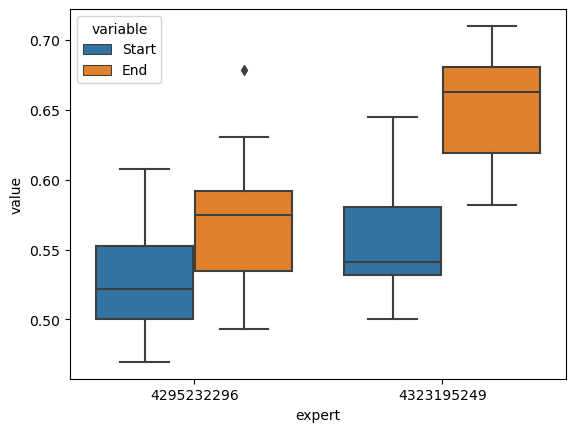

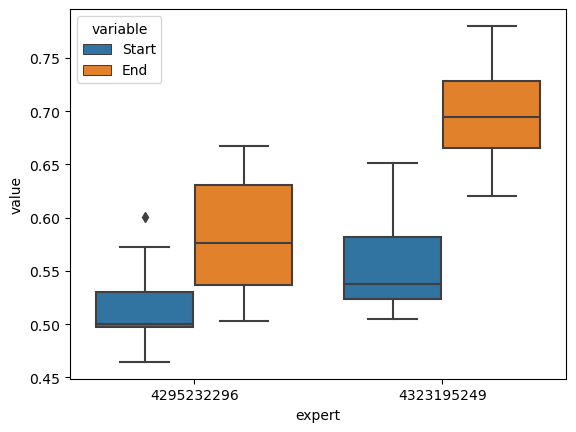

In [715]:
met = get_expert_values("Val", "accurancy_balanced")

plot_expert_values(met[2])
plot_expert_values(met[6])
df_runs

In [853]:
met = get_expert_values("Val", "accurancy_balanced")

for i in range(16):

    run = i
    expert = 4323195249

    if df_runs.iloc[i]["mod"] == "ssl":
        continue

    v1 = get_single_values(met, run, expert, "Start")
    v2 = get_single_values(met, run, expert, "End")

    res = get_ttest(v1, v2)
    if res.pvalue <= 0.05:
        print(f"run {run} with p {res.pvalue} for expert {expert}")

    expert = 4295232296

    v1 = get_single_values(met, run, expert, "Start")
    v2 = get_single_values(met, run, expert, "End")

    get_ttest(v1, v2)

    res = get_ttest(v1, v2)
    if res.pvalue <= 0.05:
        print(f"run {run} with p {res.pvalue} for expert {expert}")

run 2 with p 6.19540626091039e-05 for expert 4323195249
run 2 with p 0.0469923322181665 for expert 4295232296
run 3 with p 2.3361743556462247e-05 for expert 4323195249
run 6 with p 2.7435772736443634e-07 for expert 4323195249
run 6 with p 0.002706800088076692 for expert 4295232296
run 7 with p 9.589903316162385e-05 for expert 4323195249
run 7 with p 0.04598397568702153 for expert 4295232296
run 8 with p 0.04008895794698606 for expert 4295232296
run 9 with p 0.046552365375806426 for expert 4295232296
run 10 with p 1.195760722104384e-08 for expert 4323195249
run 10 with p 0.0003275446433969614 for expert 4295232296
run 11 with p 2.994233304825926e-05 for expert 4323195249
run 11 with p 0.017748579219644563 for expert 4295232296
run 14 with p 0.0013615223130475273 for expert 4295232296
run 15 with p 0.03854894882308851 for expert 4323195249


In [852]:
df_runs

,labeler_ids,init_size,labels_per_round,rounds,labeled,cost,overlap,setting,mod,expert_predict,sample_equal
0,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,False
1,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,right,True
2,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,False
3,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,confidence,target,True
4,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,False
5,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,right,True
6,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,False
7,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement,target,True
8,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,False
9,"[4323195249, 4295232296]",8,4,2,16,"(0, 0)",0,AL,disagreement_diff,right,True


In [846]:
def create_expert_metrics(met):
    metrics = {}
    for expert_id in met[0]:
        metrics[expert_id] = []
        for run in met:
            start_metrics = {}
            end_metrics = {}
            for seed_fold, value in run[expert_id].items():
                if "Start" in value:
                    start_metrics[seed_fold] = value["Start"]
                end_metrics[seed_fold] = value["End"]
            if len(start_metrics) == 0:
                start_metrics = end_metrics
            metrics[expert_id].append({
                "Start": start_metrics,
                "End": end_metrics
            })
    return metrics

def get_expert_df(metrics, expert_id, start=False):
    if start:
        df1 = pd.DataFrame([row["Start"] for row in metrics[expert_id]]).reset_index().melt(id_vars=['index'], var_name='seed_fold', value_name='start')
    df2 = pd.DataFrame([row["End"] for row in metrics[expert_id]]).reset_index().melt(id_vars=['index'], var_name='seed_fold', value_name='end')

    if start:
        df_final = df1
        df_final["end"] = df2["end"]
    else:
        df_final = df2
    df_final = df_final.melt(id_vars=["index", "seed_fold"], var_name="step")

    return df_final

def plot_expert_runs_al(metrics, expert_id, step, metrics_name):
    met = get_expert_values(step, metrics_name)
    df = get_expert_df(create_expert_metrics(met), expert_id, start=True)
    plt.figure()
    sns.boxplot(df, x="index", y="value", hue="step")

def plot_expert_runs_end(metrics, expert_id, step, metrics_name):
    met = get_expert_values(step, metrics_name)
    df = get_expert_df(create_expert_metrics(met), expert_id)
    plt.figure()
    sns.boxplot(df, x="index", y="value")

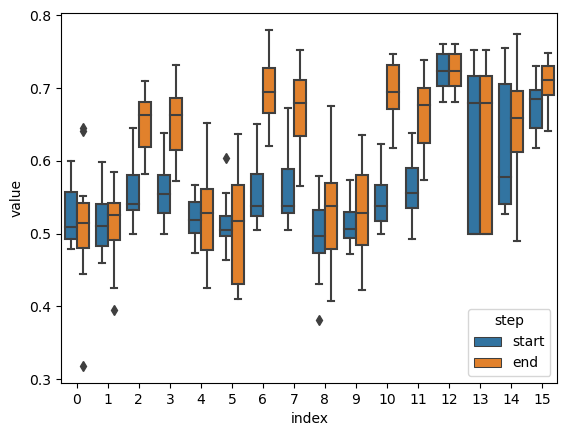

In [847]:
plot_expert_runs_al(metrics, 4323195249, "Val", "accurancy_balanced")

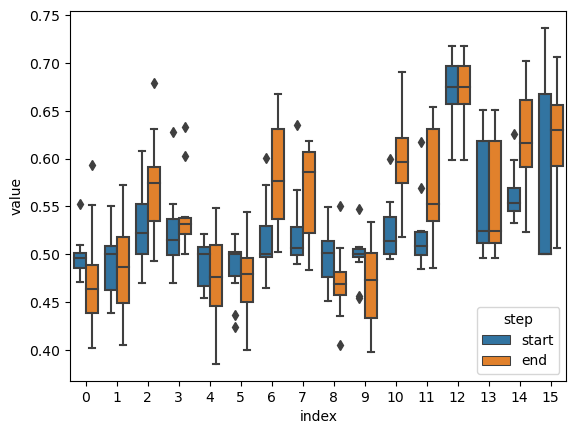

In [849]:
plot_expert_runs_al(metrics, 4295232296, "Val", "accurancy_balanced")

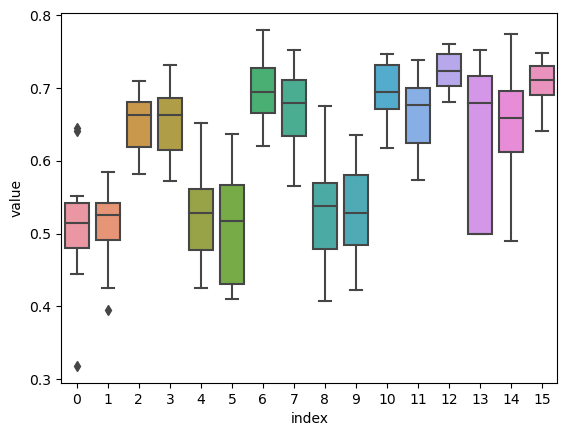

In [844]:
plot_expert_runs_end(metrics, 4323195249, "Val", "accurancy_balanced")

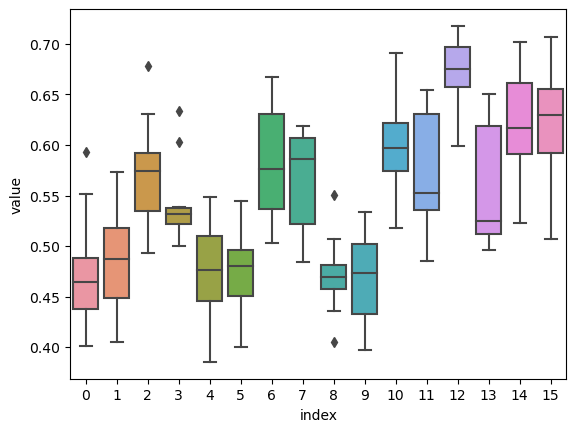

In [845]:
plot_expert_runs_end(metrics, 4295232296, "Val", "accurancy_balanced")

In [503]:
temp = pd.DataFrame(metrics[4323195249]).reset_index().melt('index', var_name='step',  value_name='vals')
temp["vals"]

0     {'Seed_1_Fold_0': 0.5714285714285714, 'Seed_1_...
1     {'Seed_1_Fold_0': 0.48376623376623373, 'Seed_1...
2     {'Seed_1_Fold_0': 0.5383141762452107, 'Seed_1_...
3     {'Seed_1_Fold_0': 0.5523627075351213, 'Seed_1_...
4     {'Seed_1_Fold_0': 0.5422077922077922, 'Seed_1_...
5     {'Seed_1_Fold_0': 0.5064935064935064, 'Seed_1_...
6     {'Seed_1_Fold_0': 0.5346956151553852, 'Seed_1_...
7     {'Seed_1_Fold_0': 0.5162337662337663, 'Seed_1_...
8     {'Seed_1_Fold_0': 0.4253246753246753, 'Seed_1_...
9     {'Seed_1_Fold_0': 0.6215410813111962, 'Seed_1_...
10    {'Seed_1_Fold_0': 0.6700723712217964, 'Seed_1_...
11    {'Seed_1_Fold_0': 0.6331168831168831, 'Seed_1_...
12    {'Seed_1_Fold_0': 0.6233766233766234, 'Seed_1_...
13    {'Seed_1_Fold_0': 0.6875266070668369, 'Seed_1_...
Name: vals, dtype: object

In [ ]:
.melt(var_name='Expert', value_name='values')